# Homework 2: Regression 

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [110]:
Elements = pd.read_csv('https://gist.githubusercontent.com/GoodmanSciences/c2dd862cd38f21b0ad36b8f96b4bf1ee/raw/1d92663004489a5b6926e944c1b3d9ec5c40900e/Periodic%2520Table%2520of%2520Elements.csv')

In [111]:
Elements

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
0,1,Hydrogen,H,1.007,0,1,1,1,1.0,gas,...,13.5984,0.000090,14.175,20.28,3.0,Cavendish,1766.0,14.304,1,1.0
1,2,Helium,He,4.002,2,2,2,1,18.0,gas,...,24.5874,0.000179,NaN,4.22,5.0,Janssen,1868.0,5.193,1,NaN
2,3,Lithium,Li,6.941,4,3,3,2,1.0,solid,...,5.3917,0.534000,453.850,1615.00,5.0,Arfvedson,1817.0,3.582,2,1.0
3,4,Beryllium,Be,9.012,5,4,4,2,2.0,solid,...,9.3227,1.850000,1560.150,2742.00,6.0,Vaulquelin,1798.0,1.825,2,2.0
4,5,Boron,B,10.811,6,5,5,2,13.0,solid,...,8.2980,2.340000,2573.150,4200.00,6.0,Gay-Lussac,1808.0,1.026,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,Flerovium,Fl,289.000,175,114,114,7,14.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,1999.0,NaN,7,4.0
114,115,Moscovium,Mc,288.000,173,115,115,7,15.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7,5.0
115,116,Livermorium,Lv,292.000,176,116,116,7,16.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,7,6.0
116,117,Tennessine,Ts,295.000,178,117,117,7,17.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7,7.0


In [112]:
Elements.keys()

Index(['AtomicNumber', 'Element', 'Symbol', 'AtomicMass', 'NumberofNeutrons',
       'NumberofProtons', 'NumberofElectrons', 'Period', 'Group', 'Phase',
       'Radioactive', 'Natural', 'Metal', 'Nonmetal', 'Metalloid', 'Type',
       'AtomicRadius', 'Electronegativity', 'FirstIonization', 'Density',
       'MeltingPoint', 'BoilingPoint', 'NumberOfIsotopes', 'Discoverer',
       'Year', 'SpecificHeat', 'NumberofShells', 'NumberofValence'],
      dtype='object')

In [113]:
qm7b = pd.read_csv('http://faculty.washington.edu/tingcao/wordpress/wp-content/uploads/2020/10/qm7b.csv');
qm7b.head()

,id,ae_pbe0,emax_zindo,imax_zindo,homo_zindo,lumo_zindo,e1_zindo,ip_zindo,ea_zindo,homo_pbe0,...,homo_gw,lumo_gw,p_pbe0,p_scs,n_H,n_C,n_N,n_O,n_S,n_Cl
0,1,-420.933746,39.694626,0.621841,-16.013,4.162,36.768073,15.72523,-3.98613,-10.9488,...,-14.1341,1.0870,2.534576,2.43222,4,1,0,0,0,0
1,2,-718.419189,22.622486,0.628328,-13.549,3.684,11.717433,13.41121,-3.49181,-9.5577,...,-12.5472,1.1186,4.332028,4.44500,6,2,0,0,0,0
2,3,-570.024841,22.940671,0.709060,-10.160,1.231,7.137266,9.75211,-0.82042,-7.8768,...,-10.4383,1.9456,4.173282,3.92308,4,2,0,0,0,0
3,4,-410.286163,15.973798,2.228480,-10.706,2.145,4.624107,10.46577,-1.89847,-8.4021,...,-11.1629,1.1958,3.512394,3.32175,2,2,0,0,0,0
4,5,-868.855408,17.900516,0.556174,-12.365,3.825,10.311655,11.96491,-3.57487,-8.3534,...,-10.8132,1.2002,5.480160,5.78632,6,3,0,0,0,0


In [114]:
qm7b.keys()

Index(['id', 'ae_pbe0', 'emax_zindo', 'imax_zindo', 'homo_zindo', 'lumo_zindo',
       'e1_zindo', 'ip_zindo', 'ea_zindo', 'homo_pbe0', 'lumo_pbe0', 'homo_gw',
       'lumo_gw', 'p_pbe0', 'p_scs', 'n_H', 'n_C', 'n_N', 'n_O', 'n_S',
       'n_Cl'],
      dtype='object')

| Column Name | Unit  |  Description |
|----------|----------|-----------|
|ae_pbe0   |kcal/mol  |Atomization energy (DFT/PBE0)
|p_pbe0    |Angstrom^3|Polarizability (DFT/PBE0)
|p_scs     |Angstrom^3|Polarizability (self-consistent screening)
|homo_gw   |eV        |Highest occupied molecular orbital (GW)
|homo_pbe0 |eV        |Highest occupied molecular orbital (DFT/PBE0)
|homo_zindo|eV        |Highest occupied molecular orbital (ZINDO/s)
|lumo_gw   |eV        |Lowest unoccupied molecular orbital (GW)
|lumo_pbe0 |eV        |Lowest unoccupied molecular orbital (DFT/PBE0)
|lumo_zindo|eV        |Lowest unoccupied molecular orbital (ZINDO/s)
|ip_zindo  |eV        |Ionization potential (ZINDO/s)
|ea_zindo  |eV        |Electron affinity (ZINDO/s)
|e1_zindo  |eV        |First excitation energy (ZINDO)
|emax_zindo|eV        |Maximal absorption intensity (ZINDO)
|imax_zindo|arbitrary |Excitation energy at maximal absorption (ZINDO)
|n_H       |          |number of Hydrogen atoms
|n_C       |          |number of Carbon atoms
|n_N       |          |number of Nitrogen atoms
|n_O       |          |number of Oxygen atoms
|n_S       |          |number of Sulfur atoms
|n_Cl      |          |number of Chlorine atoms

In [115]:
qm7b.shape

(7211, 21)

## Warm-Up (5 points)

Plot a scatter graph of `AtomicNumber` vs. `SpecificHeat`, with Atomic Number on the X axis. Label your axes and title accordingly.

In [116]:
# AlWAYS CHECK NA VALUES 
Elements.isnull().sum()

AtomicNumber           0
Element                0
Symbol                 0
AtomicMass             0
NumberofNeutrons       0
NumberofProtons        0
NumberofElectrons      0
Period                 0
Group                 28
Phase                  0
Radioactive           81
Natural               28
Metal                 26
Nonmetal              99
Metalloid            111
Type                   3
AtomicRadius          32
Electronegativity     22
FirstIonization       16
Density               13
MeltingPoint          20
BoilingPoint          20
NumberOfIsotopes      15
Discoverer             9
Year                  11
SpecificHeat          33
NumberofShells         0
NumberofValence       69
dtype: int64

In [117]:
data2= Elements.dropna(subset=['AtomicNumber','SpecificHeat'])

Text(0, 0.5, 'Specific Heat')

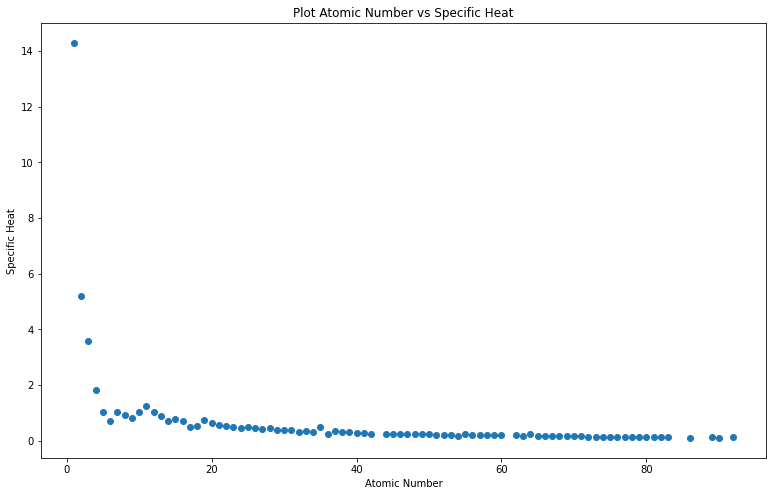

In [118]:
plt.figure(figsize = (13,8))
plt.scatter(data2['AtomicNumber'], data2['SpecificHeat'])
plt.title('Plot Atomic Number vs Specific Heat')
plt.xlabel('Atomic Number')
plt.ylabel('Specific Heat')

## 1. Polynomial Regression (30 points)

*The process flow for performing non-linear regression is essentially the same as that for linear regression. The main distinction lies in the specification of the class of model (Step #1) and model hyperparameters (Step #2). We will be working through some non-linear regressions in this homework. In question 1, we have set up steps 1 and 2 for you.*

- Define a features matrix and target array in preparation for performing a fitting to the Atomic Number vs. Specific Heat plot you plotted above. 
- Experiment with different *degrees* of polynomial fitting (anything <10)
- Experiment with performing different degrees of fitting with `fit(1/X,y)` instead of `fit(X,y)`  

**What is the simplest fitting that gives you an $R^2$ value larger than 0.99? Overlay this plot on the original scatterpoints, and plot a few earlier attemps on the same or different axes, with appropriate labels and a legend.**

In [119]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [120]:
from sklearn.pipeline import make_pipeline
#The number in PolynomialFeatures() specifies the degree of your polynomial fitting
poly_model = make_pipeline(PolynomialFeatures(3),
                           LinearRegression())

In [121]:
X_atomic_num = data2[['AtomicNumber']]

In [122]:
X_atomic_num.head()

,AtomicNumber
0,1
1,2
2,3
3,4
4,5


In [123]:
Y_specific_heat = data2['SpecificHeat']

In [124]:
poly_model.fit(X_atomic_num,Y_specific_heat)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [125]:
Y_specific_heat_fit_1 = poly_model.predict(X_atomic_num)

Text(0, 0.5, 'Specific Heat')

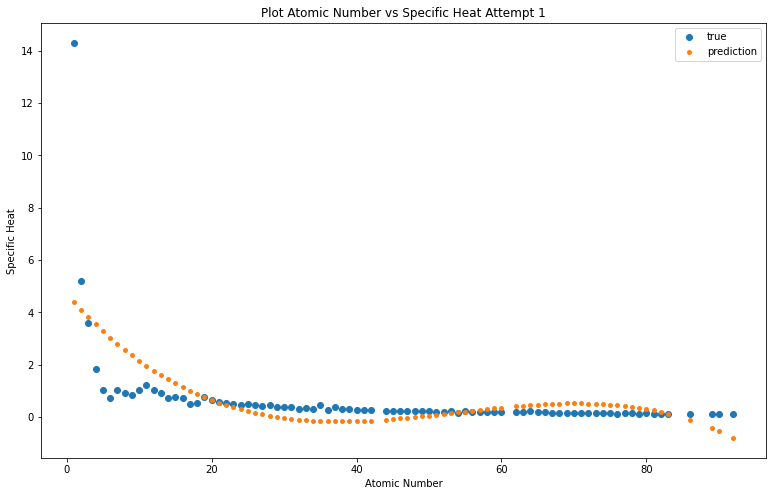

In [126]:
plt.figure(figsize = (13,8))
plt.scatter(data2['AtomicNumber'], data2['SpecificHeat'],label='true')
plt.scatter(data2['AtomicNumber'], Y_specific_heat_fit_1,s=15,label='prediction')
plt.title('Plot Atomic Number vs Specific Heat Attempt 1')
plt.legend()
plt.xlabel('Atomic Number')
plt.ylabel('Specific Heat')

In [127]:
r2_attempt1 = r2_score(Y_specific_heat,Y_specific_heat_fit_1)
r2_attempt1

0.4221228304306809

Varying the polynomial degree from 1 to 9, while still trying to fit (X,Y)

In [128]:
p_vec = range(1,10)
r2_vec = []

for ip in p_vec:
    poly_model = make_pipeline(PolynomialFeatures(ip),
                           LinearRegression())
    poly_model.fit(X_atomic_num,Y_specific_heat)
    Y_specific_heat_fit_2 = poly_model.predict(X_atomic_num)
    r2_val = r2_score(Y_specific_heat,Y_specific_heat_fit_2)
    r2_vec.append(r2_val)
    
pd.DataFrame({'Poly_degree':p_vec,'R-squared':r2_vec})

,Poly_degree,R-squared
0,1,0.165072
1,2,0.302843
2,3,0.422123
3,4,0.530365
4,5,0.632032
5,6,0.724245
6,7,0.803730
7,8,0.528152
8,9,0.363881


In [129]:
poly_model2 = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())
poly_model2.fit(X_atomic_num,Y_specific_heat)
Y_specific_heat_fit_3 = poly_model.predict(X_atomic_num)
r2_val2 = r2_score(Y_specific_heat,Y_specific_heat_fit_3)

Text(0, 0.5, 'Specific Heat')

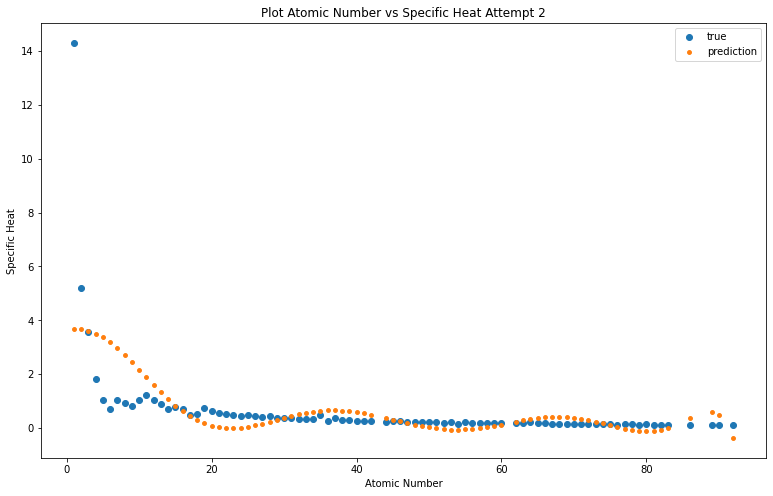

In [130]:
plt.figure(figsize = (13,8))
plt.scatter(data2['AtomicNumber'], data2['SpecificHeat'],label='true')
plt.scatter(data2['AtomicNumber'], Y_specific_heat_fit_3,s=15,label='prediction')
plt.title('Plot Atomic Number vs Specific Heat Attempt 2')
plt.legend()
plt.xlabel('Atomic Number')
plt.ylabel('Specific Heat')

Trying to fit the original 3rd degree polynomial with (1/X,Y)

In [131]:
poly_model.fit(1/np.power(X_atomic_num,1),Y_specific_heat)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9)),
                ('linearregression', LinearRegression())])

In [132]:
Y_specific_heat_fit_2 = poly_model.predict(1/X_atomic_num)

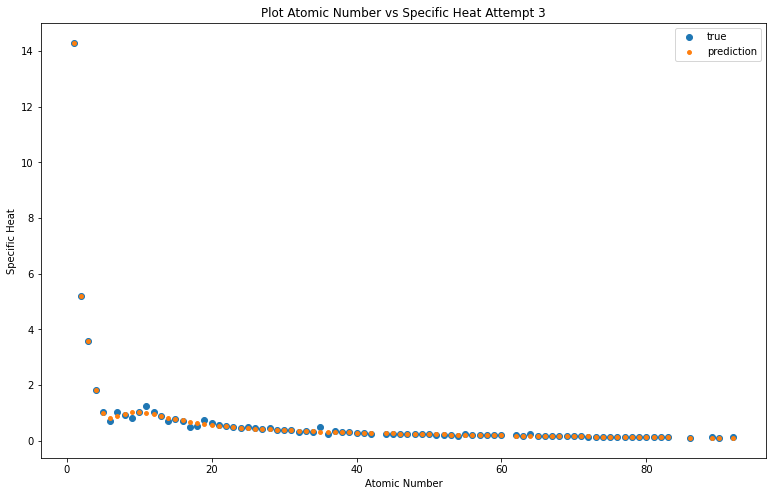

In [133]:
plt.figure(figsize = (13,8))
plt.scatter(data2['AtomicNumber'], data2['SpecificHeat'],label='true')
plt.scatter(data2['AtomicNumber'], Y_specific_heat_fit_2,s=15,label='prediction')
plt.title('Plot Atomic Number vs Specific Heat Attempt 3')
plt.legend()
plt.xlabel('Atomic Number')
plt.ylabel('Specific Heat')
plt.savefig('atomic_num_vs_specific_heat_plot.png')

In [134]:
r2_attempt2 = r2_score(Y_specific_heat,Y_specific_heat_fit_2)
r2_attempt2

0.9987383444778296

Text(0, 0.5, 'Specific Heat')

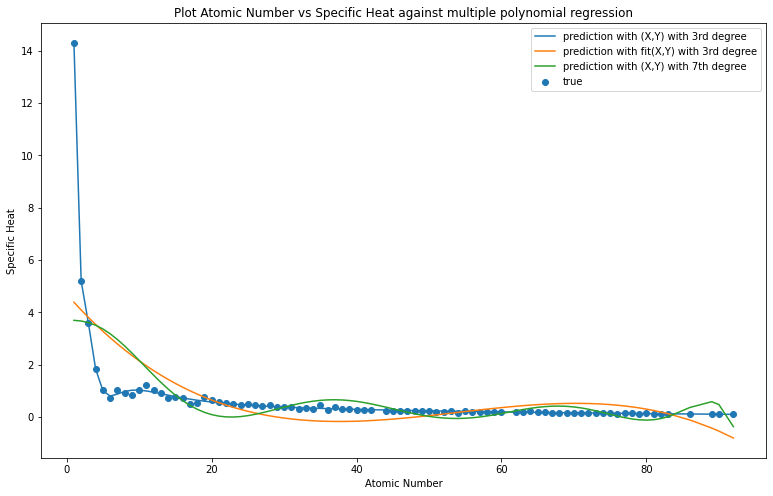

In [167]:
plt.figure(figsize = (13,8))
plt.scatter(data2['AtomicNumber'], data2['SpecificHeat'],label='true')
plt.plot(data2['AtomicNumber'], Y_specific_heat_fit_2,label='prediction with (X,Y) with 3rd degree')
plt.plot(data2['AtomicNumber'], Y_specific_heat_fit_1,label='prediction with fit(X,Y) with 3rd degree')
plt.plot(data2['AtomicNumber'], Y_specific_heat_fit_3,label='prediction with (X,Y) with 7th degree')
plt.title('Plot Atomic Number vs Specific Heat against multiple polynomial regression')
plt.legend()
plt.xlabel('Atomic Number')
plt.ylabel('Specific Heat')
#plt.savefig('atomic_num_vs_specific_heat_plot.png')

So, based on the polynomial fit, if we fit (X,Y), the highest R-squared is with 7th polynomial degree. With (1/X,Y) fit, we can use a lower cubic polynomial fit as the original polynomial model. 

## 2. Multilinear Regression (30 points)

Create a target array `gap` for bandgap - the difference between `lumo_zindo` and `homo_zindo`. 

In [136]:
#Check number of NA 
qm7b.isnull().sum()

id            0
ae_pbe0       0
emax_zindo    0
imax_zindo    0
homo_zindo    0
lumo_zindo    0
e1_zindo      0
ip_zindo      0
ea_zindo      0
homo_pbe0     0
lumo_pbe0     0
homo_gw       0
lumo_gw       0
p_pbe0        0
p_scs         0
n_H           0
n_C           0
n_N           0
n_O           0
n_S           0
n_Cl          0
dtype: int64

In [137]:
gap = qm7b['lumo_zindo'] - qm7b['homo_zindo']

In [138]:
gap.head()

0    20.175
1    17.233
2    11.391
3    12.851
4    16.190
dtype: float64

Perform a multilinear regression of `ip_zindo` and `ea_zindo` to `gap` (`gap` being the target array). Create a parity plot and 3d plot of your modeled vs. original datapoints, then find the $R^2$ value and Mean Squared Error of your fitting. Is this a good fitting?

In [139]:
model2 = linear_model.LinearRegression()

In [140]:
X2 = qm7b[['ip_zindo','ea_zindo']]
X2.shape

(7211, 2)

In [141]:
model2.fit(X2,gap)

LinearRegression()

In [142]:
Y_fit = model2.predict(X2)

### 3D Plot of modeled vs original datapoints

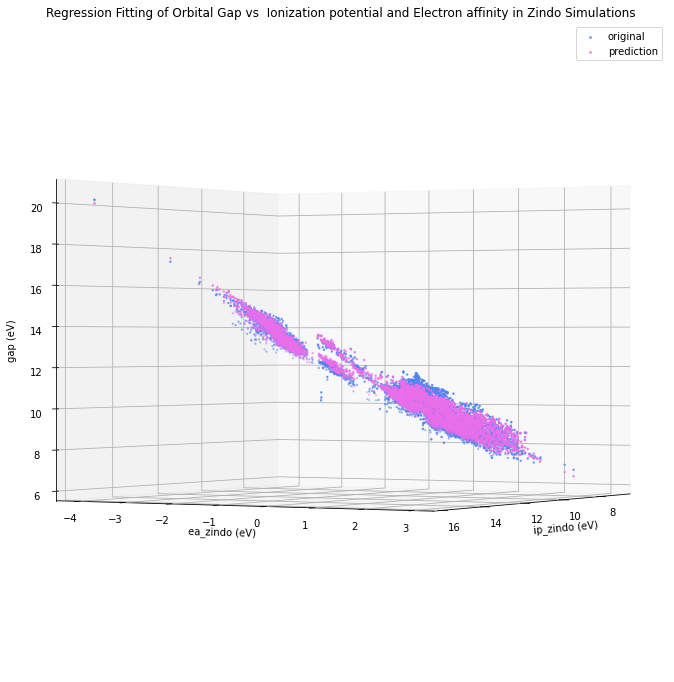

In [143]:
#Step 5
plt.figure(figsize=(15,12))
ax = plt.axes(projection = '3d')
ax = plt.axes(projection='3d')
plot1=ax.scatter3D(qm7b['ip_zindo'], qm7b['ea_zindo'], gap, s=2, 
                   c='#5284F2', label='original')
plot2=ax.scatter3D(qm7b['ip_zindo'], qm7b['ea_zindo'],
                   model2.predict(X2), c='#EA6EEA', s=2, 
                   label='prediction')
#as always, play around with these angles to explore the fitted plane/surface
ax.view_init(0,30)
ax.set_xlabel('ip_zindo (eV)')
ax.set_ylabel('ea_zindo (eV)')
ax.set_zlabel('gap (eV)')
#ax.set_zlim(20,15)
ax.legend()
ax.set_title('Regression Fitting of Orbital Gap vs  Ionization potential and Electron affinity in Zindo Simulations')
plt.show()

### Parity Plot of modeled vs original fitted gap values

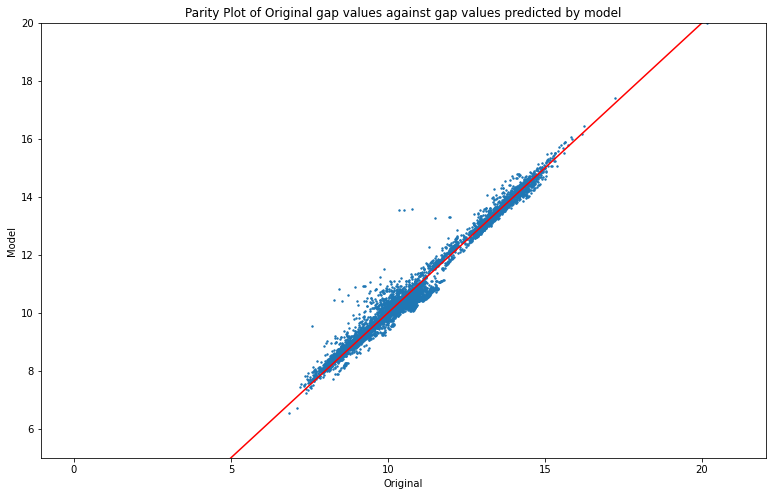

beta_0, beta_i:  1.8208885900382263 [ 0.91751478 -0.94141107]


In [144]:
plt.figure(figsize=(13,8))
plt.title('Parity Plot of Original gap values against gap values predicted by model')
#plt.xlim(0,15)
plt.ylim(5,20)
plt.scatter(gap,model2.predict(X2), s=2)
plt.xlabel('Original')
plt.ylabel('Model')
#for reference, plot line x=y
plt.plot(np.linspace(0,21,21),np.linspace(0,21,21), c='r')
plt.show()
print('beta_0, beta_i: ', model2.intercept_, model2.coef_)

### $R^2$ and MSE Measurement of the regression

In [145]:
r2_multi = r2_score(gap,Y_fit)
r2_multi

0.9788644032025069

In [146]:
mse_multi = mean_squared_error(gap,Y_fit)
mse_multi

0.07068734283115137

Considering the regression has $R^2$ of about 97.8% and MSE of 0.7%, I think it is a good fit. Furthermore, the parity plot shows that the the regression is able to predict most of the datapoints correctly. 

## 3. 3D Polynomial Fitting (35 points)

Recall from Hands-on 5 that a flat plane was fitted to a plot of `e1_zindo` against `homo_zindo` and `lumo_zindo`. With a polynomial fitting we would able to plot curved surfaces rather than just flat planes. 

a) Using the polynomial fitting technique introduced in question 1, perform a polynomial fitting to this same data (to a degree of your choice) and plot your fitting on the same 3D axes as the original data.  
b) Is your new fitting an improvement over the multiple linear regression fitting performed in the hands-on 5 notebook? Use regression metrics of your choice to demonstrate this.  
c) Now try some different degree polynomials to what you had originally used. Consider writing a loop structure to test (with appropriate regression metrics) for the optimal degree number (say no higher than 30) for modeling this data.  
d) Plot this optimized fitting on the same axes as the original data, with appropriate labeling. 

Recall that this is the data we will be performing a fitting to:

Text(0.5, 0.92, 'First Excitation Energy vs HOMO and LUMO in Zindo Simulations')

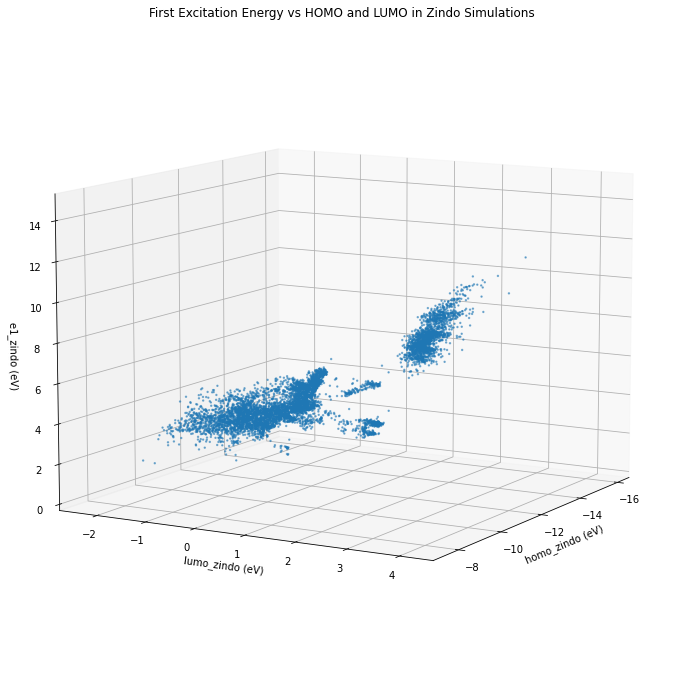

In [147]:
plt.figure(figsize=(15,12))
ax = plt.axes(projection = '3d',zlim = [0,15])
plot1=ax.scatter3D(qm7b['homo_zindo'], qm7b['lumo_zindo'], qm7b['e1_zindo'], s=2, alpha=0.5)
ax.view_init(10,30)
ax.set_xlabel('homo_zindo (eV)')
ax.set_ylabel('lumo_zindo (eV)')
ax.set_zlabel('e1_zindo (eV)')
ax.set_title('First Excitation Energy vs HOMO and LUMO in Zindo Simulations')

### Looking at the data from 2D perspective

Text(0, 0.5, 'e1_zindo (eV)')

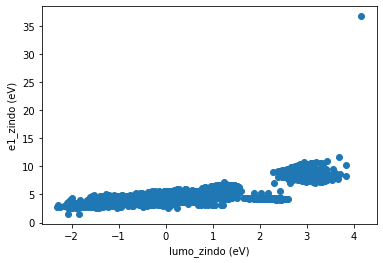

In [148]:
plt.scatter(qm7b['lumo_zindo'], qm7b['e1_zindo'])
plt.xlabel('lumo_zindo (eV)')
plt.ylabel('e1_zindo (eV)')

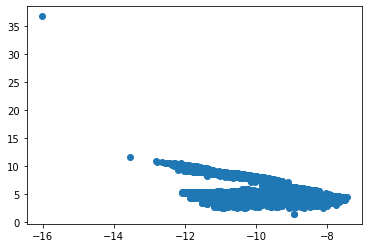

In [149]:
plt.scatter(qm7b['homo_zindo'], qm7b['e1_zindo'])

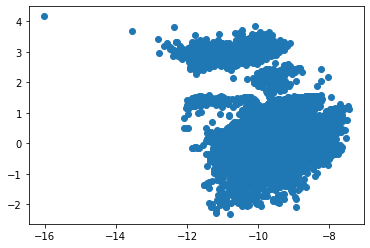

In [150]:
plt.scatter(qm7b['homo_zindo'], qm7b['lumo_zindo'])

In [151]:
poly_model3 = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())

In [152]:
X_homo_lumo_zindo = qm7b[['homo_zindo','lumo_zindo']]

In [153]:
Y_e1_zindo = qm7b['e1_zindo']

In [154]:
poly_model3.fit(X_homo_lumo_zindo,Y_e1_zindo)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

Text(0.5, 0.92, 'Regression Fitting of First Excitation Energies vs HOMO and LUMO in Zindo Simulations')

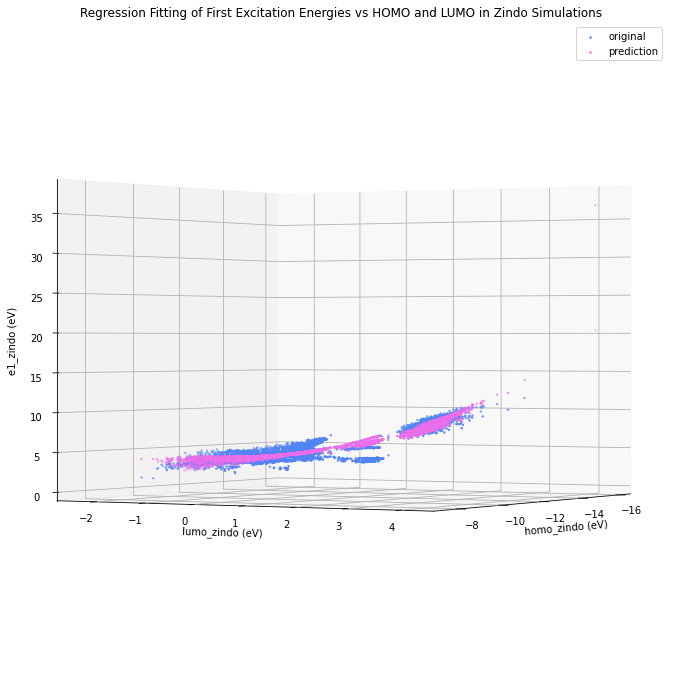

In [155]:
plt.figure(figsize=(15,12))
ax = plt.axes(projection = '3d')
ax = plt.axes(projection='3d')
plot1=ax.scatter3D(qm7b['homo_zindo'], qm7b['lumo_zindo'], qm7b['e1_zindo'], s=2, 
                   c='#5284F2', label='original')
plot2=ax.scatter3D(qm7b['homo_zindo'], qm7b['lumo_zindo'],
                   poly_model3.predict(qm7b[['homo_zindo','lumo_zindo']]), c='#EA6EEA', s=2, 
                   label='prediction')
#as always, play around with these angles to explore the fitted plane/surface
ax.view_init(0,30)
ax.set_xlabel('homo_zindo (eV)')
ax.set_ylabel('lumo_zindo (eV)')
ax.set_zlabel('e1_zindo (eV)')
#ax.set_zlim(20,15)
ax.legend()
ax.set_title('Regression Fitting of First Excitation Energies vs HOMO and LUMO in Zindo Simulations')

In [156]:
r2_score(qm7b['e1_zindo'],poly_model3.predict(qm7b[['homo_zindo','lumo_zindo']]))

0.8225503683315943

In [157]:
mean_squared_error(qm7b['e1_zindo'],poly_model3.predict(qm7b[['homo_zindo','lumo_zindo']]))

0.6172838995900289

The fitting is better when we use higher order polynomial regression than just linear regression from week 5 hands-on based on $R^2$ and MSE values. The $R^2$ from week 5 notebook is 75.7% while MSE is 84.6%. In week 5 notebook we used multilinear regression instead of polynomial regression, so it will have worse performance since we are trying to a fit a plane rather than a curved surface. Even fitting the model multi-quadratic regresion will achieve better performance, with higher $R^2$ of 82.2% and lower MSE of 61.7%. This makes sense because when we plot the data, the shape of the data is some curved surface. 

#### Trying different degree of polynomial regression 

In [158]:
r2_vec =[]
mse_score =[]

for i in range(2,31):
    poly_model4 = make_pipeline(PolynomialFeatures(i),
                           LinearRegression())
    poly_model4.fit(X_homo_lumo_zindo,Y_e1_zindo)
    Y2_fit = poly_model4.predict(X_homo_lumo_zindo)
    mse_val = mean_squared_error(qm7b['e1_zindo'],Y2_fit)
    r2 = r2_score(qm7b['e1_zindo'],Y2_fit)
    mse_score.append(mse_val)
    r2_vec.append(r2)

In [159]:
table = {'poly degree':range(2,31),'R-squared': r2_vec,'MSE' : mse_score}
pd.DataFrame(table)

,poly degree,R-squared,MSE
0,2,0.822550,0.617284
1,3,0.850982,0.518379
2,4,0.856417,0.499473
3,5,0.870992,0.448773
4,6,0.866421,0.464673
5,7,0.871400,0.447352
6,8,0.913096,0.302308
7,9,0.924767,0.261709
8,10,0.928325,0.249330
9,11,0.932419,0.235089


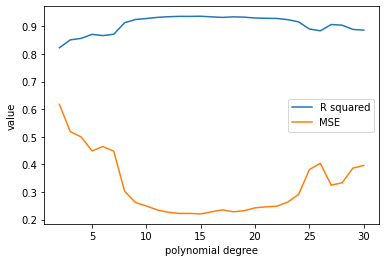

In [160]:
plt.plot(range(2,31),r2_vec,label='R squared')
plt.plot(range(2,31),mse_score,label='MSE')
plt.xlabel('polynomial degree')
plt.ylabel('value')
plt.legend()

In [161]:
index_max = np.argmax(np.array(r2_vec))
x = range(2,31)
print('Optimal degree:', x[index_max])
print('max R-squared:', r2_vec[index_max])
print('min MSE:', mse_score[index_max])

Optimal degree: 15
max R-squared: 0.9365912778474118
min MSE: 0.22057630049924337


When we vary the degree of polynomial regression, we achieved lowest MSE and highest R-squared when the polynomial degree is 15. We can also see from the plot as we increase the polynomial degree, the R-squared begins to decrease and the MSE begins to increase. Thus, having complicated model is not necessarily be better because the model is too sensitive to very small change. 

In [162]:
poly_model4 = make_pipeline(PolynomialFeatures(15),
                           LinearRegression())
poly_model4.fit(X_homo_lumo_zindo,Y_e1_zindo)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=15)),
                ('linearregression', LinearRegression())])

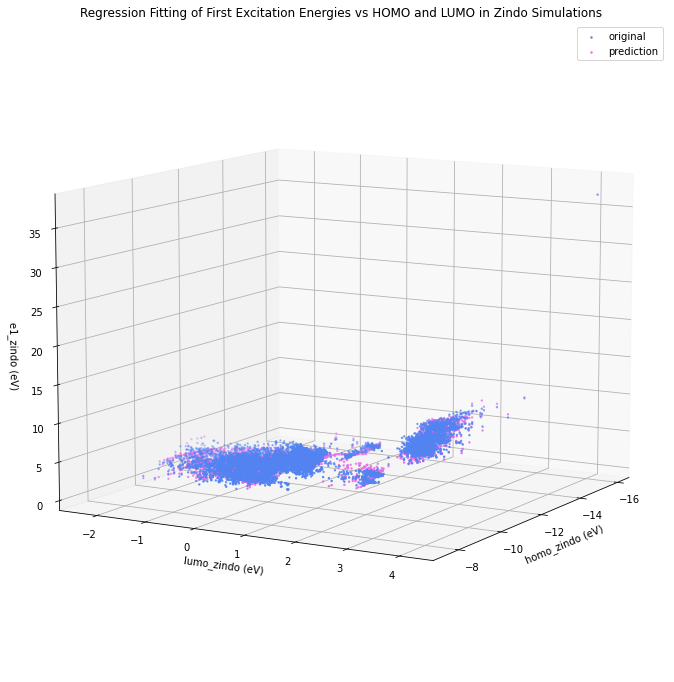

In [163]:
plt.figure(figsize=(15,12))
ax = plt.axes(projection = '3d')
ax = plt.axes(projection='3d')
plot1=ax.scatter3D(qm7b['homo_zindo'], qm7b['lumo_zindo'], qm7b['e1_zindo'], s=2, 
                   c='#5284F2', label='original')
plot2=ax.scatter3D(qm7b['homo_zindo'], qm7b['lumo_zindo'],
                   poly_model4.predict(qm7b[['homo_zindo','lumo_zindo']]), c='#EA6EEA', s=2, 
                   label='prediction')
#as always, play around with these angles to explore the fitted plane/surface
ax.view_init(10,30)
ax.set_xlabel('homo_zindo (eV)')
ax.set_ylabel('lumo_zindo (eV)')
ax.set_zlabel('e1_zindo (eV)')
#ax.set_zlim(20,15)
ax.legend()
ax.set_title('Regression Fitting of First Excitation Energies vs HOMO and LUMO in Zindo Simulations')
plt.show()